# Fast Food Nutrition

## Objectives
The objective of this project is to use data mining and analysis techniques to identify the healthiest fast food options among the selected restaurants. The goal is to segment the data into healthy and unhealthy food categories using K-means, DBSCAN and hierarchical clustering techniques.

Recommended Nutrients:

According to the updated daily value recommendations by U.S. Food and Drug Administration **FDA**, the following nutrients are recommended for a healthy diet:

- Calcium: aim for foods with at least 1300mg per serving
- Dietary Fiber: aim for foods with at least 28g per serving
- Fat: limit intake to no more than 78g per day
- Vitamin A: aim for foods with at least 900mcg RAE per day
- Vitamin C: aim for foods with at least 90mg per serving
- Sodium: limit intake to no more than 2400mg per day
- Total carbohydrate: limit intake to no more than 300g per day
- Sugars: limit intake to no more than 50g per day
- Cholesterol: limit intake to no more 300mg per day
- Proteins: 50g per day
- Calories: about 1600 - 2500 kcal/day

    
## Data Source
Kaggle (https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition)

## Data Overview
The Fast Food Nutrition Dataset provides a comprehensive breakdown of the nutritional content of various fast food products from popular fast food chains. This dataset is designed to help consumers make more informed decisions about their food choices by shedding light on the nutritional value of fast food products.

Fast food is convenient and affordable, but it is also notorious for its high-calorie, high-fat, and high-sugar content. This dataset aims to provide a valuable resource for nutritionists, researchers, and health-conscious individuals by providing information on calories, fat, carbohydrates, protein, and other key nutrients.

The dataset contains 515 samples and 17 columns:
- restaurant: The name of the fast food chain restaurant where the food item is sold.
- item: The name of the fast food item.
- calories: The number of calories in the food item.
- cal_fat: The number of calories that come from fat in the food item.
- total_fat: The total amount of fat in grams in the food item.
- sat_fat: The amount of saturated fat in grams in the food item.
- trans_fat: The amount of trans fat in grams in the food item.
- cholesterol: The amount of cholesterol in milligrams in the food item.
- sodium: The amount of sodium in milligrams in the food item.
- total_carb: The total amount of carbohydrates in grams in the food item.
- fiber: The amount of dietary fiber in  in the food item.
- sugar: The amount of sugar  in the food item.
- protein: The amount of protein in grams in the food item.
- vit_a: The Amount Vitamin A in the food item.
- vit_c: The Amount  of Vitamin C in the food item.
- calcium: The Amount of the calcium in the food item.
- salad: 


**References**
- https://www.fda.gov/food/new-nutrition-facts-label/daily-value-new-nutrition-and-supplement-facts-labels
- https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import warnings
from sklearn.metrics import silhouette_score

pd.set_option("display.precision",2)
pd.set_option("display.float_format","{:.2f}".format)
warnings.filterwarnings("ignore")

### Read and Inspect the Data 

In [ ]:
data = pd.read_csv("./fastfood.csv")

data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.00,0.00,95,1110,44,3.00,11,37.00,4.00,20.00,20.00,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.00,1.50,130,1580,62,2.00,18,46.00,6.00,20.00,20.00,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.00,3.00,220,1920,63,3.00,18,70.00,10.00,20.00,50.00,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.00,0.50,155,1940,62,2.00,18,55.00,6.00,25.00,20.00,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.00,0.50,120,1980,81,4.00,18,46.00,6.00,20.00,20.00,Other


### Data Statistical Summary

In [ ]:
data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.00,515.00,515.00,515.00,515.00,515.00,515.00,515.00,503.00,515.00,514.00,301.00,305.00,305.00
mean,530.91,238.81,26.59,8.15,0.47,72.46,1246.74,45.66,4.14,7.26,27.89,18.86,20.17,24.85
std,282.44,166.41,18.41,6.42,0.84,63.16,689.95,24.88,3.04,6.76,17.68,31.38,30.59,25.52
min,20.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,330.00,120.00,14.00,4.00,0.00,35.00,800.00,28.50,2.00,3.00,16.00,4.00,4.00,8.00
50%,490.00,210.00,23.00,7.00,0.00,60.00,1110.00,44.00,3.00,6.00,24.50,10.00,10.00,20.00
75%,690.00,310.00,35.00,11.00,1.00,95.00,1550.00,57.00,5.00,9.00,36.00,20.00,30.00,30.00
max,2430.00,1270.00,141.00,47.00,8.00,805.00,6080.00,156.00,17.00,87.00,186.00,180.00,400.00,290.00


### Data Disualization

In [ ]:
def histogram(data, feature, figsize=(12, 7)):
    """
    Plot a histogram of a given feature in the given dataframe.

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=feature, kde=False, palette="winter")
    
    # Add mean line plot to the histogram
    plt.axvline(data[feature].mean(), color="green", linestyle="--")  
    # Add median line plot to the histogram
    plt.axvline(data[feature].median(), color="black", linestyle="-")  
    
    
    plt.title(f"Histogram of {feature}")
    plt.show()

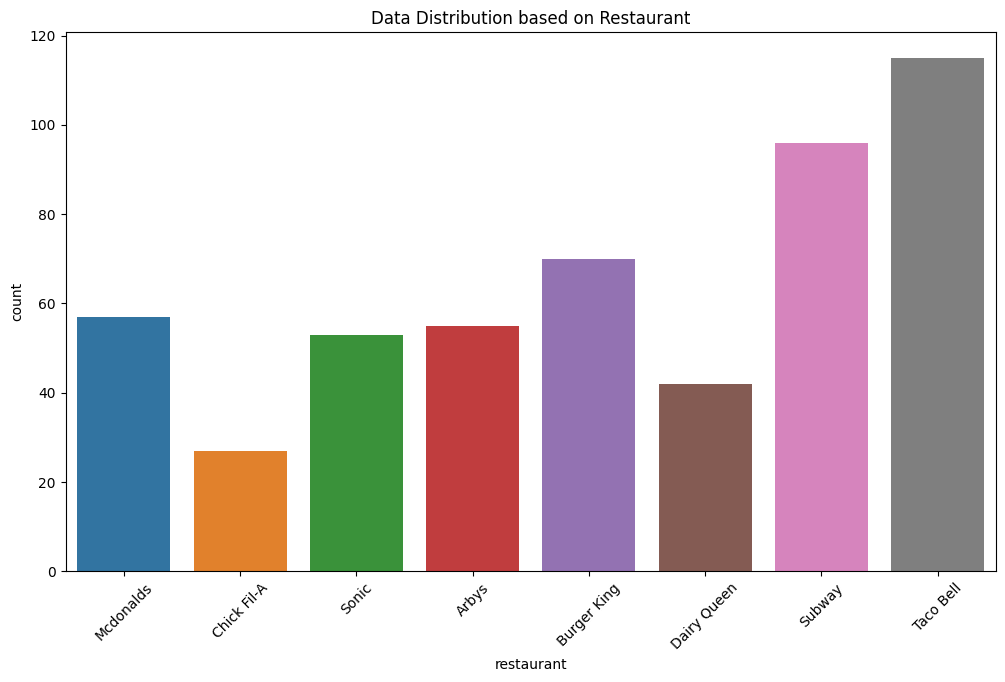

In [ ]:
# Visualize Data Distribution based on Restaurant
plt.figure(figsize=(12,7))
sns.countplot(x='restaurant', data=data)
plt.xticks(rotation=45)
plt.title('Data Distribution based on Restaurant')
plt.show()

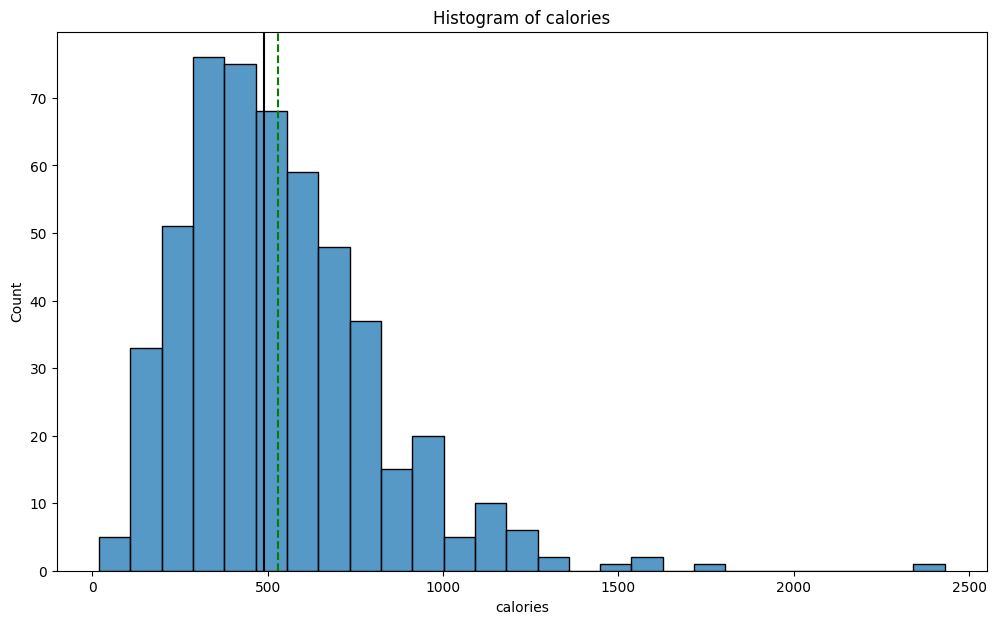

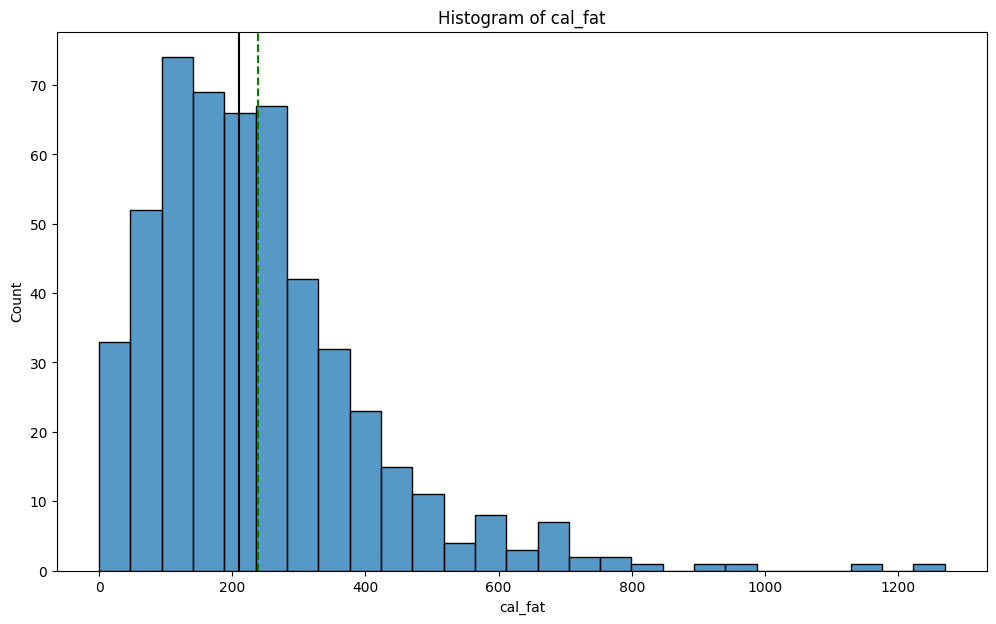

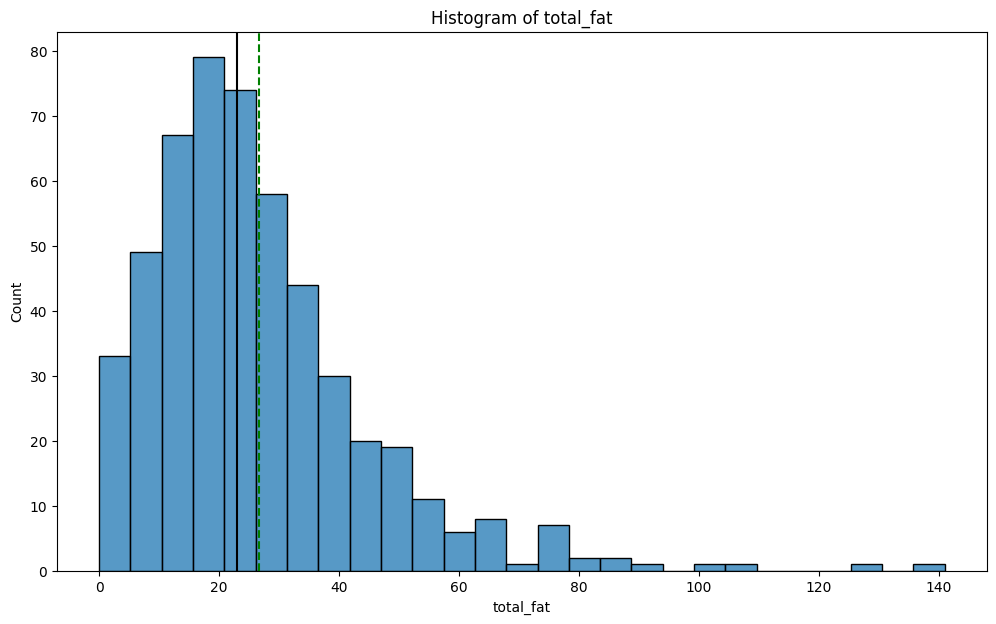

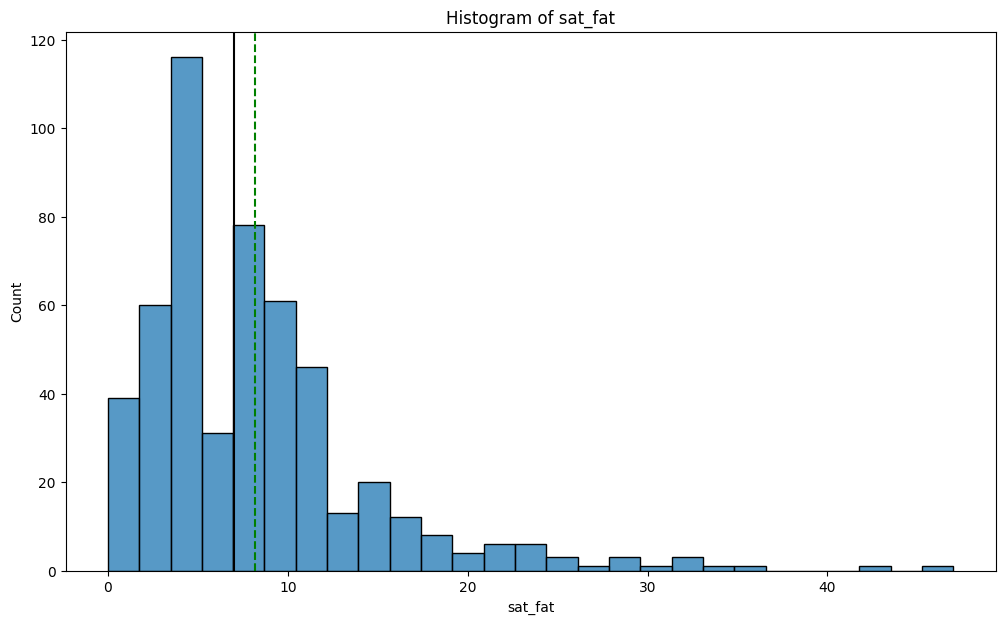

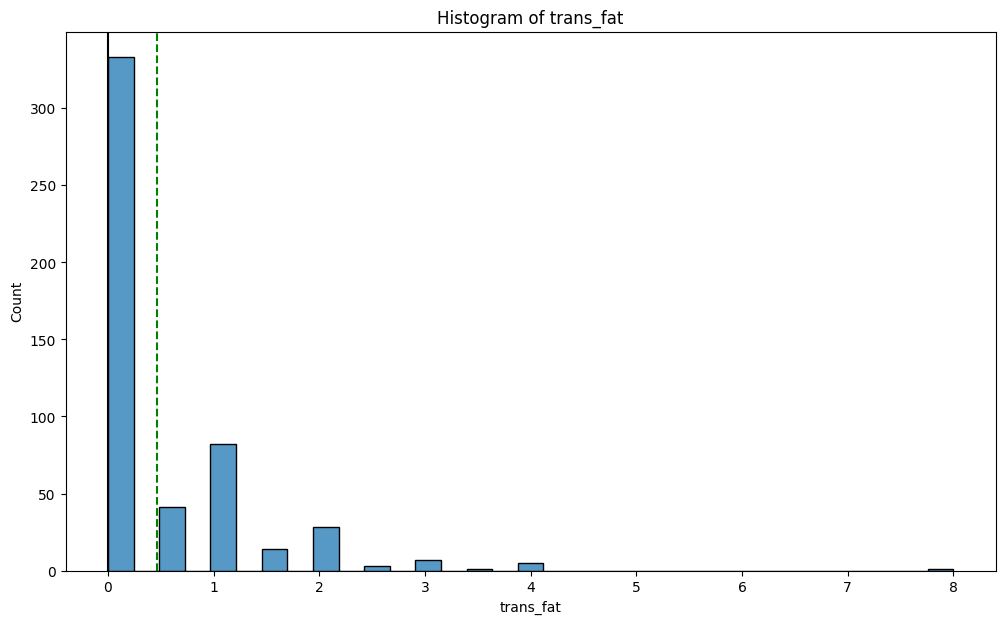

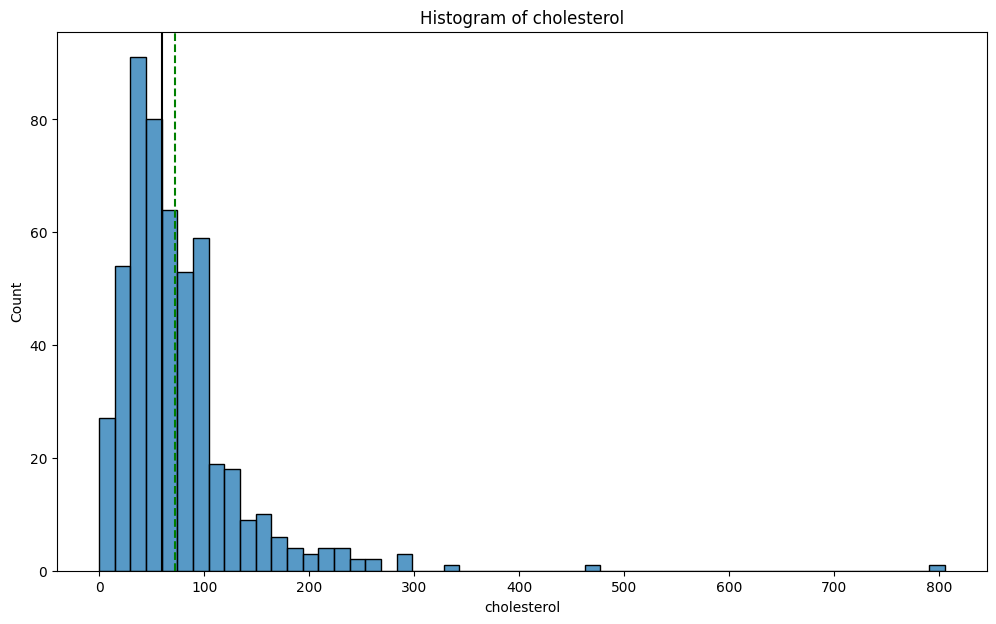

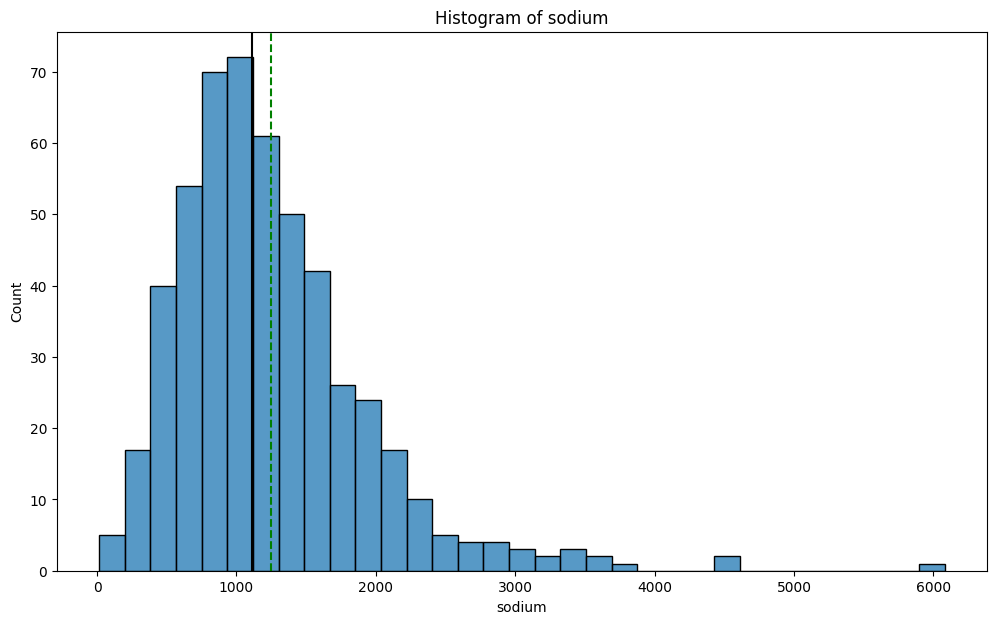

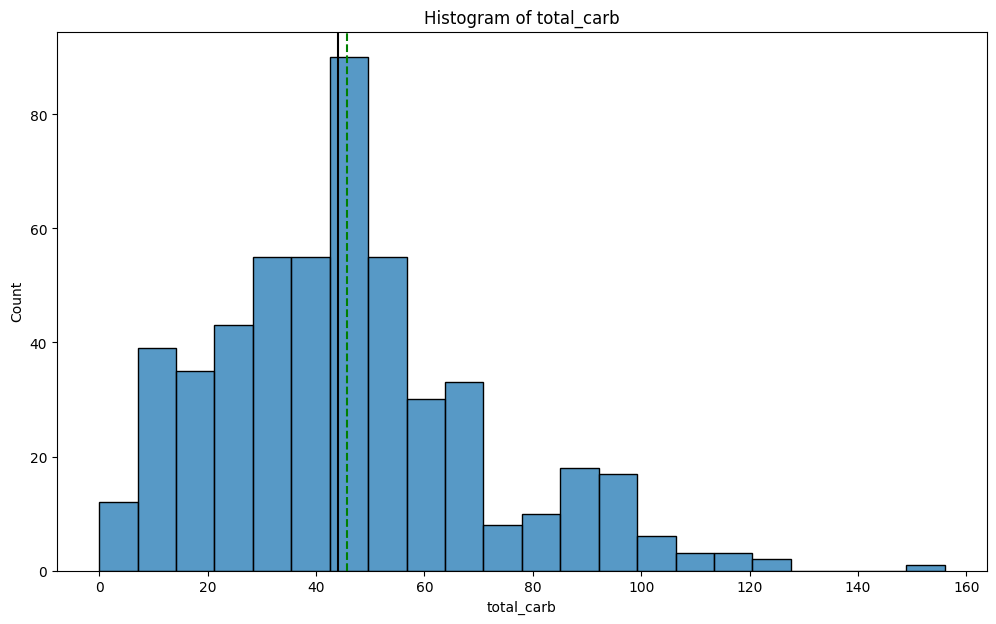

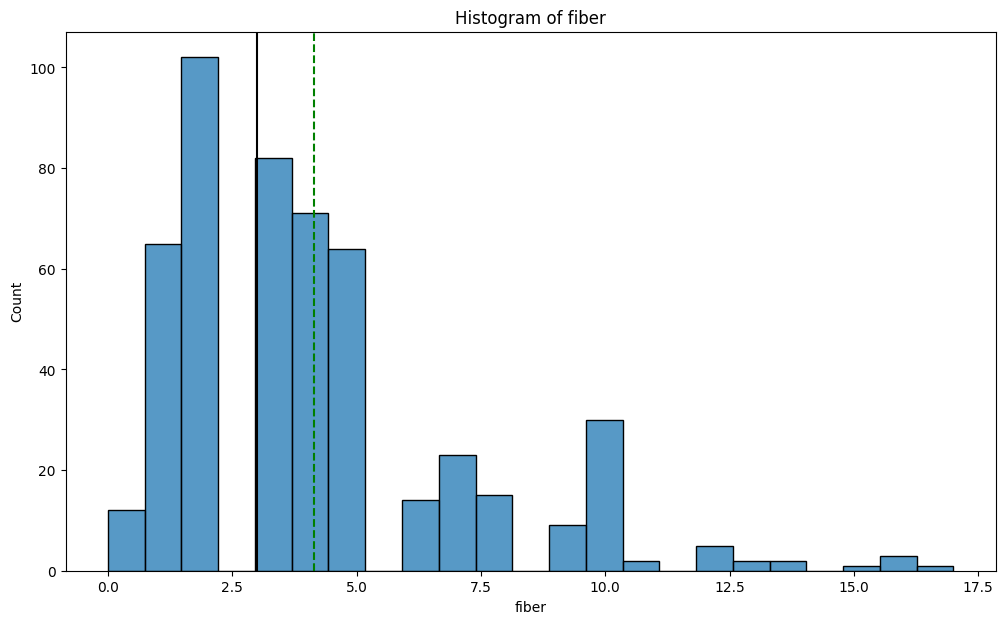

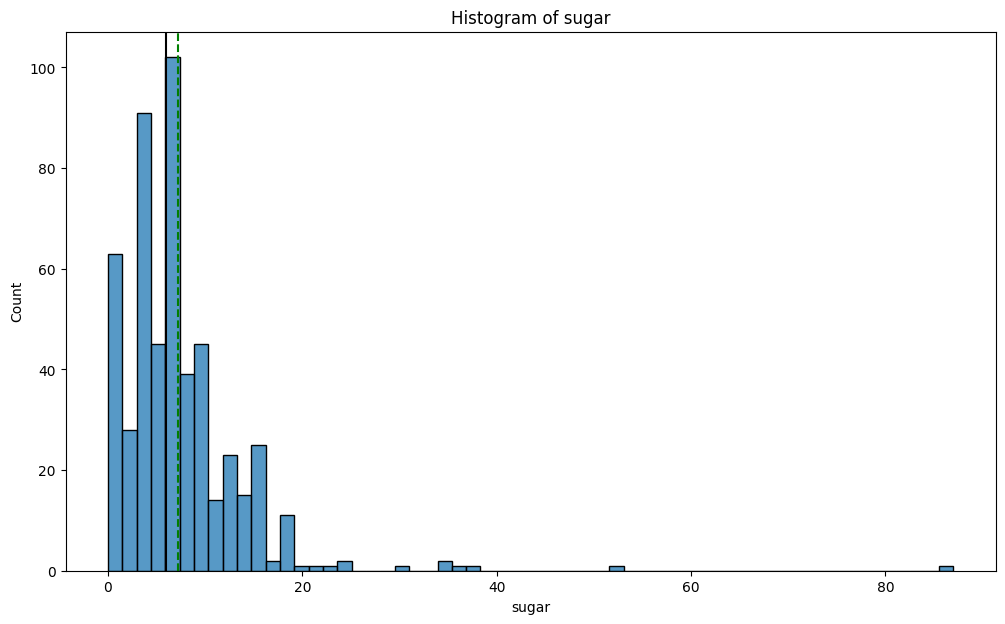

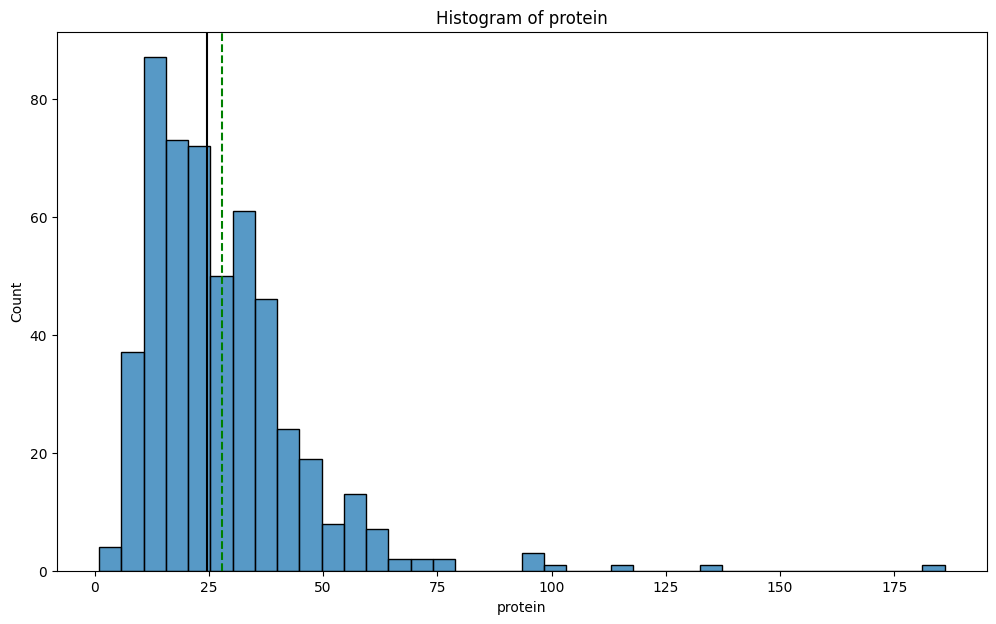

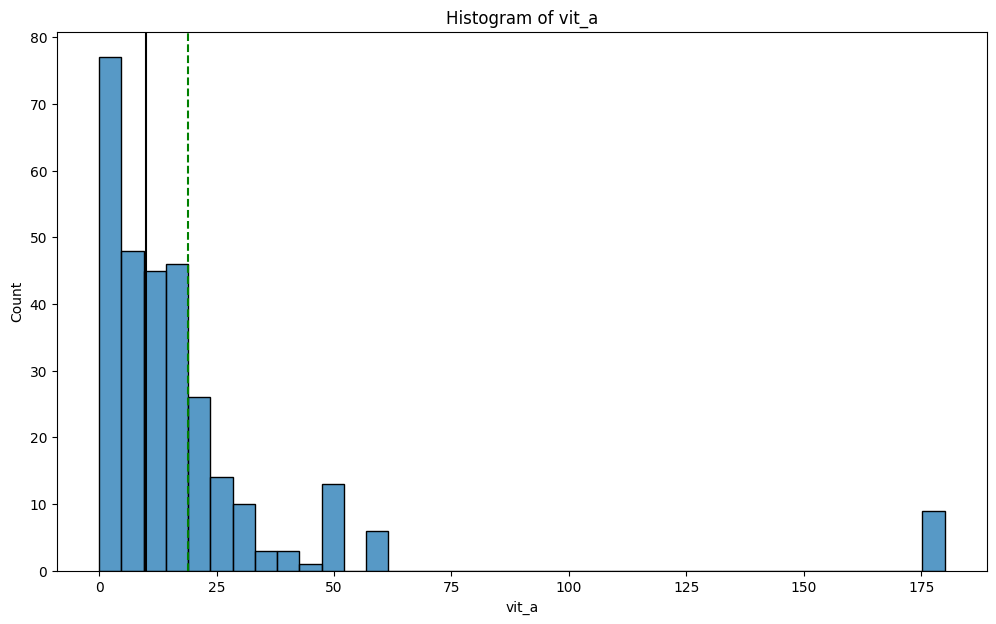

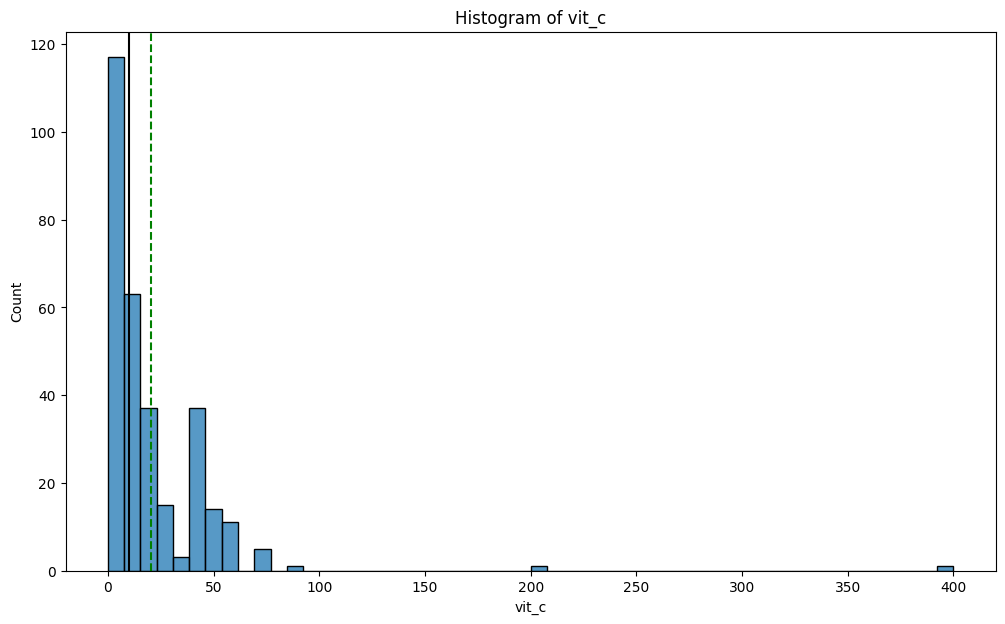

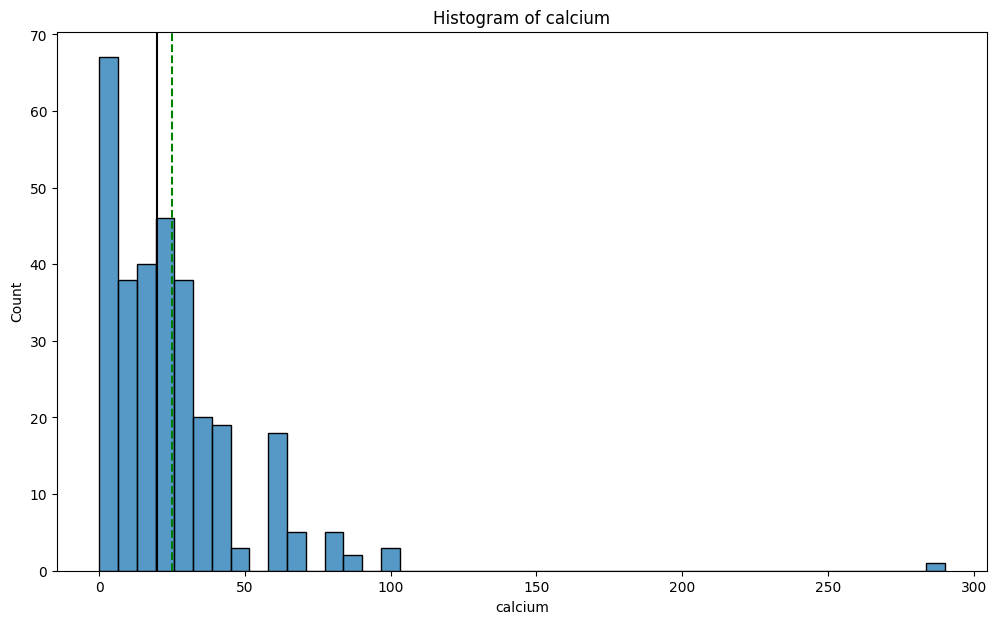

In [ ]:
# Visualize numerical columns using histogram
# Select the columns of interest
columns_of_interest = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 
                       'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 
                       'protein', 'vit_a', 'vit_c', 'calcium',
                      ]

# Plot histograms for each column
for col in columns_of_interest:
    histogram(data=data, feature=col)
    plt.show()

### Data Preprocessing

#### Check for and handle missing values

In [ ]:
data.isnull().any()

restaurant     False
item           False
calories       False
cal_fat        False
total_fat      False
sat_fat        False
trans_fat      False
cholesterol    False
sodium         False
total_carb     False
fiber           True
sugar          False
protein         True
vit_a           True
vit_c           True
calcium         True
salad          False
dtype: bool

In [ ]:
# Fill Columns with null values with mean 
cols = ["fiber","protein","vit_a","vit_c","calcium"]
data[cols] = data[cols].fillna(data[cols].mean())


#### Feature Selection

- Select columns that will be used to perfom clustering


In [ ]:
train_data = data.drop([
    'restaurant','item','cal_fat','sat_fat','trans_fat','salad',
], axis=1)

#### Data Scaling
Scale the data to reduce the effects of Outliers and large values

In [ ]:
sc = StandardScaler()
feature_cols = train_data.columns


train_data = sc.fit_transform(train_data)
train_data = pd.DataFrame(train_data, columns=feature_cols)

### Perfom Clustering Using K-means

### Find the best number of clusters using the elbow method

we use the elbow method to identify the best number of clusters by looking for the elbow point in the plot

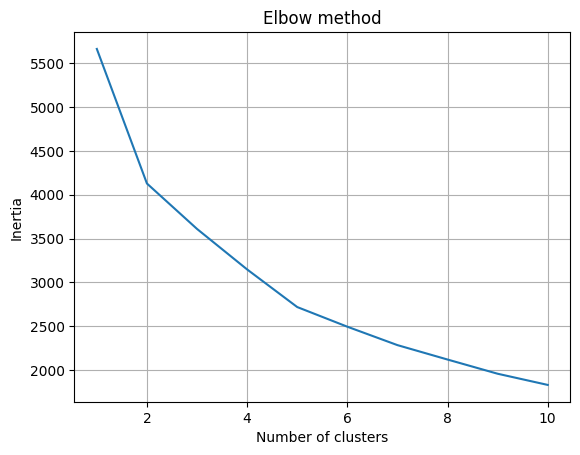

In [ ]:
# Find the best number of clusters using the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia)
plt.xlabel('Number of clusters')
plt.grid()
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

From The plot the best number of clusters is 2

In [ ]:
# Apply k-means clustering with the best number of clusters
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(train_data)

# Add the cluster labels to the original dataframe

kmeans_data=data.copy()
kmeans_data['cluster'] = kmeans.labels_

# Display the number of samples in each cluster
kmeans_data['cluster'].value_counts()

1    359
0    156
Name: cluster, dtype: int64

#### Visualize the clusters

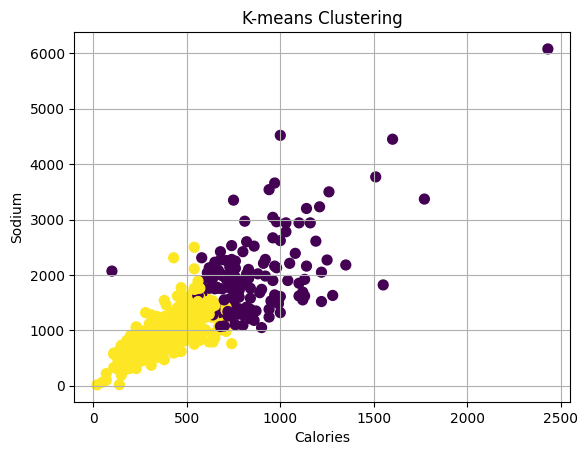

In [ ]:
# Plotting the clusters
plt.scatter(x=kmeans_data['calories'], y=kmeans_data['sodium'], c=kmeans_data['cluster'], s=50, cmap='viridis')
plt.xlabel('Calories')
plt.ylabel('Sodium')
plt.title('K-means Clustering')
plt.grid(True)
plt.show()

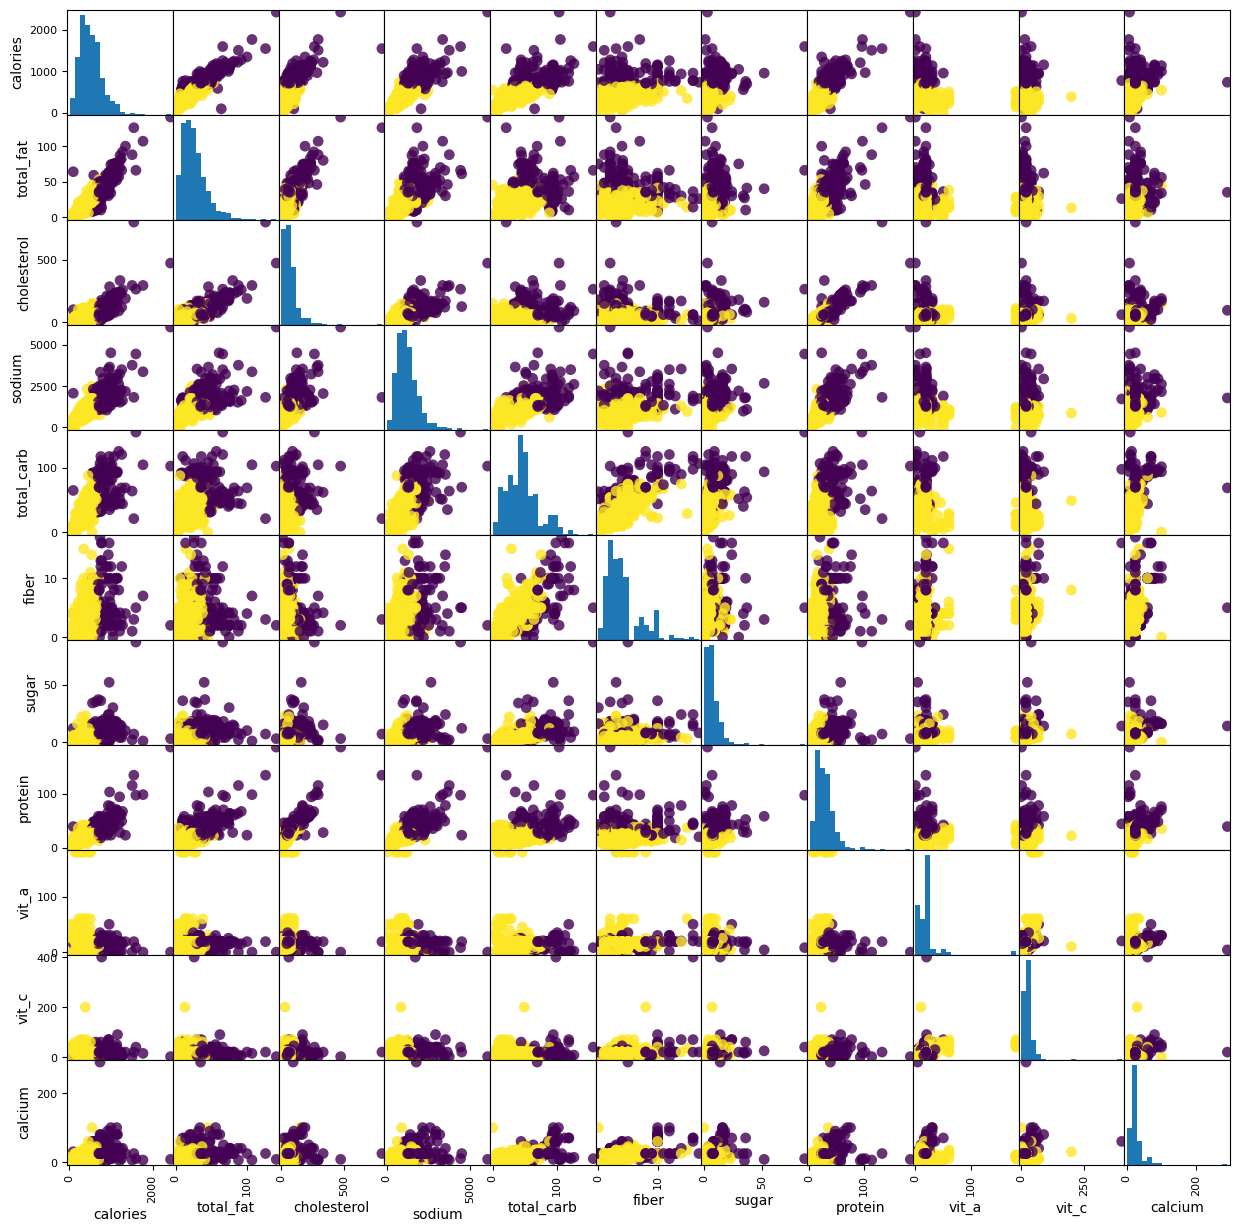

In [ ]:
scatter_matrix(kmeans_data[feature_cols], c=kmeans_data["cluster"], figsize=(15, 15),
               marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.show()

In [ ]:
km_cluster_profile = kmeans_data.groupby("cluster").mean()
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
cluster,,,,,,,,,,,,,,
0,850.000000,395.653846,44.070513,13.496795,0.932692,124.326923,1949.294872,69.737179,5.559196,12.141026,45.140327,16.164835,24.050715,35.433060
1,392.256267,170.660167,18.994429,5.831476,0.261838,49.916435,941.448468,35.203343,3.519252,5.142061,20.395543,20.027059,18.484378,20.254760


#### K-mean Clustering Insights
Based on the cluster means: 


Group 0 has significantly higher values for most of the nutrients, including calories, total fat, saturated fat, cholesterol, sodium, and protein. On the other hand, group 1 has lower values for these nutrients and higher values for vitamin A

Cluster 1 appears to have healthier foods as they have lower average values for calories, total fat, saturated fat, trans fat, cholesterol, and sodium compared to Cluster 0.

#### Inspect some the foods in each cluster

In [ ]:
cluster_0 = kmeans_data[kmeans_data["cluster"]==0]["item"]
print("Cluster 0 Foods")
for food in list(cluster_0)[:20]:
    print(f"\t\t{food}")

cluster_1 = kmeans_data[kmeans_data["cluster"]==1]["item"]
print("Cluster 1 Foods")
for food in list(cluster_1)[:20]:
    print(f"\t\t{food}")

Cluster 0 Foods
		Single Bacon Smokehouse Burger
		Double Bacon Smokehouse Burger
		Grilled Bacon Smokehouse Chicken Sandwich
		Crispy Bacon Smokehouse Chicken Sandwich
		Double Quarter Pounder® with Cheese
		Crispy Garlic White Cheddar Chicken Sandwich
		Grilled Maple Bacon Dijon Chicken Sandwich
		Crispy Maple Bacon Dijon Chicken Sandwich
		Grilled Pico Guacamole Chicken Sandwich
		Crispy Pico Guacamole Chicken Sandwich
		Signature Sriracha Burger
		Grilled Signature Sriracha Chicken Sandwich
		Crispy Signature Sriracha Chicken Sandwich
		Sweet BBQ Bacon 1/4 lb Burger
		Grilled Sweet BBQ Bacon Chicken Sandwich
		Crispy Sweet BBQ Bacon Chicken Sandwich
		6 piece Buttermilk Crispy Chicken Tenders
		10 piece Buttermilk Crispy Chicken Tenders
		12 piece Buttermilk Crispy Chicken Tenders
		20 piece Buttermilk Crispy Chicken Tenders
Cluster 1 Foods
		Artisan Grilled Chicken Sandwich
		Big Mac
		Cheeseburger
		Classic Chicken Sandwich
		Double Cheeseburger
		Filet-O-Fish®
		Garlic White Che

### Hierarchical Clustering

#### Using AgglomerativeClustering

In [ ]:
Hc_model = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
Hc_model.fit(train_data)

AgglomerativeClustering(affinity='euclidean', linkage='average')

In [ ]:
Hc_model_data=data.copy()
Hc_model_data['cluster'] = Hc_model.labels_

# Display the number of samples in each cluster
Hc_model_data['cluster'].value_counts()

0    514
1      1
Name: cluster, dtype: int64

In [ ]:
Hc_model_profile = Hc_model_data.groupby("cluster").mean()
Hc_model_profile.style.highlight_max(color="lightgreen", axis=0)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
cluster,,,,,,,,,,,,,,
0,530.428016,238.850195,26.591440,8.155642,0.465953,72.480545,1245.817121,45.562257,4.114098,7.249027,27.859710,18.854919,19.431524,24.784079
1,780.000000,220.000000,26.000000,7.000000,0.000000,60.000000,1720.000000,98.000000,16.000000,14.000000,44.000000,20.000000,400.000000,60.000000


In [ ]:
cluster_0 = Hc_model_data[Hc_model_data["cluster"]==0]["item"]
print("Cluster 0 Foods")
for food in list(cluster_0)[:20]:
    print(f"\t\t{food}")

cluster_1 = Hc_model_data[Hc_model_data["cluster"]==1]["item"]
print("Cluster 1 Foods")
for food in list(cluster_1)[:20]:
    print(f"\t\t{food}")

Cluster 0 Foods
		Artisan Grilled Chicken Sandwich
		Single Bacon Smokehouse Burger
		Double Bacon Smokehouse Burger
		Grilled Bacon Smokehouse Chicken Sandwich
		Crispy Bacon Smokehouse Chicken Sandwich
		Big Mac
		Cheeseburger
		Classic Chicken Sandwich
		Double Cheeseburger
		Double Quarter Pounder® with Cheese
		Filet-O-Fish®
		Garlic White Cheddar Burger
		Grilled Garlic White Cheddar Chicken Sandwich
		Crispy Garlic White Cheddar Chicken Sandwich
		Hamburger
		Lobster Roll
		Maple Bacon Dijon 1/4 lb Burger
		Grilled Maple Bacon Dijon Chicken Sandwich
		Crispy Maple Bacon Dijon Chicken Sandwich
		McChicken
Cluster 1 Foods
		Footlong Turkey & Bacon Avocado


### DBSCAN clustering

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(train_data)

In [ ]:
dbscan_data=data.copy()
dbscan_data['cluster'] = dbscan_labels

# Display the number of samples in each cluster
dbscan_data['cluster'].value_counts()

 0    490
-1     13
 2      9
 1      3
Name: cluster, dtype: int64

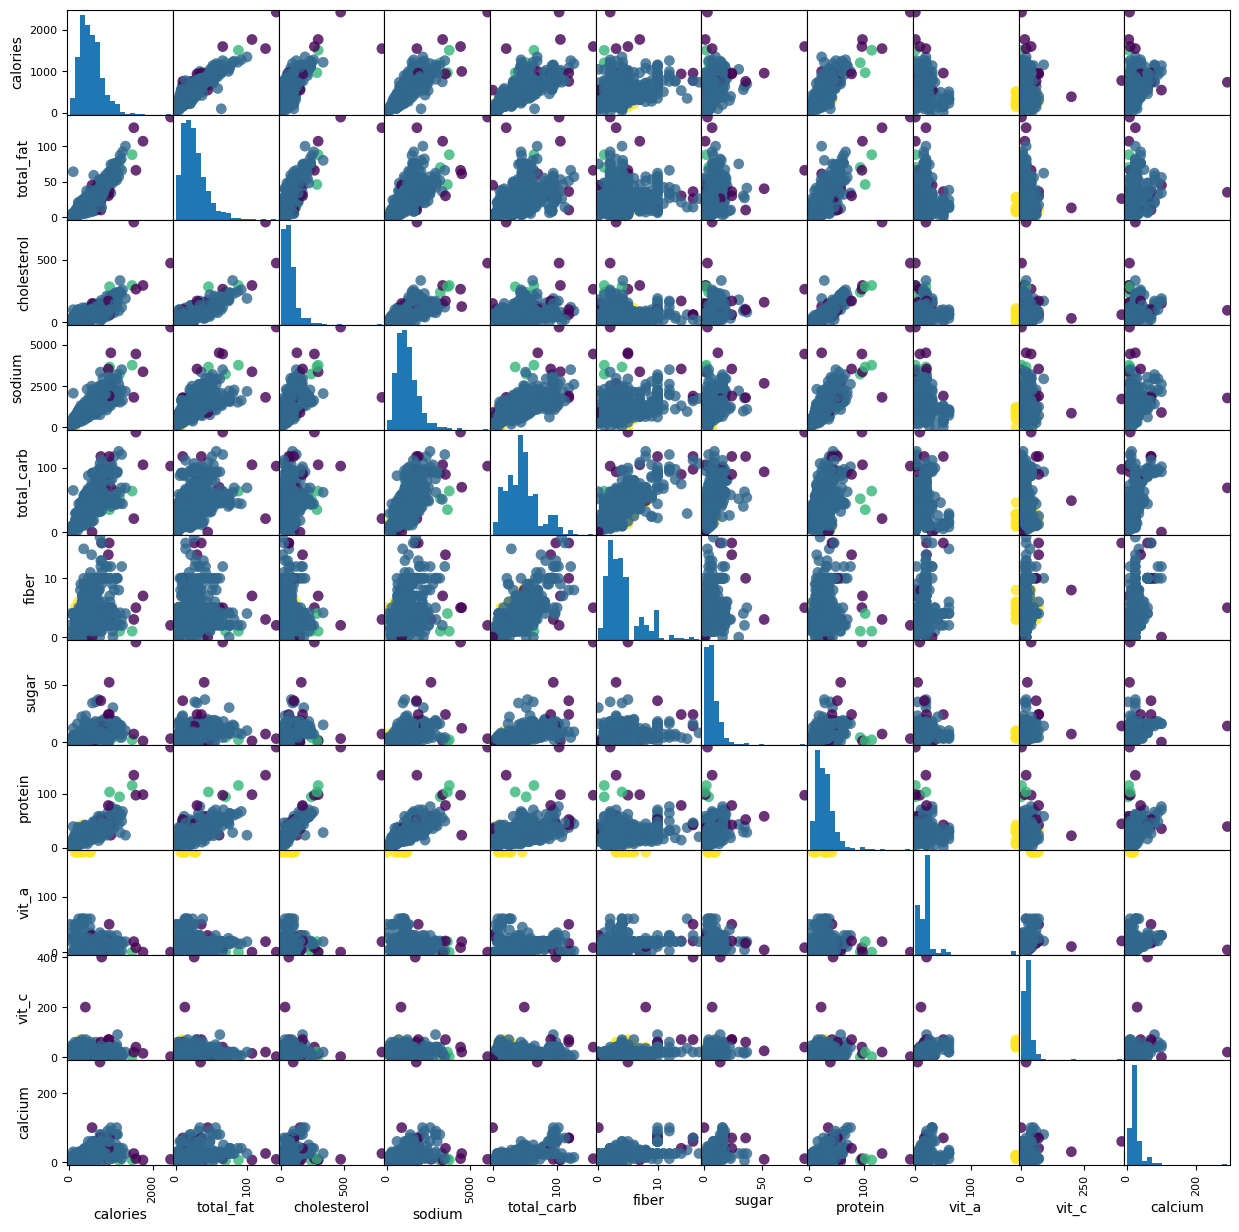

In [ ]:
scatter_matrix(dbscan_data[feature_cols], c=dbscan_data["cluster"], figsize=(15, 15),
               marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.show()

In [ ]:
dbscan_profile =dbscan_data.groupby("cluster").mean()
dbscan_profile.style.highlight_max(color="lightgreen", axis=0)

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
cluster,,,,,,,,,,,,,,
-1,1110.000000,506.461538,56.615385,14.346154,1.038462,214.615385,2723.846154,83.923077,7.230769,21.615385,69.846154,15.362637,72.487768,57.054224
0,514.918367,231.165306,25.732653,8.041837,0.457143,67.653061,1201.183673,45.042857,4.054380,6.924490,26.348757,16.067055,18.262168,24.280228
1,1230.000000,611.333333,68.000000,9.833333,0.666667,273.333333,3553.333333,50.333333,2.000000,2.333333,104.000000,6.285714,7.333333,6.666667
2,332.222222,144.444444,16.111111,4.722222,0.000000,61.666667,824.444444,22.666667,4.888889,6.555556,25.888889,180.000000,52.777778,15.555556


In [ ]:
for cluster in dbscan_data["cluster"].unique():
    cluster_data = dbscan_data[dbscan_data["cluster"]==cluster]["item"]
    print(f"Cluster {cluster} Foods")
    for food in list(cluster_data)[:20]:
        print(f"\t\t{food}")

Cluster 0 Foods
		Artisan Grilled Chicken Sandwich
		Single Bacon Smokehouse Burger
		Double Bacon Smokehouse Burger
		Grilled Bacon Smokehouse Chicken Sandwich
		Crispy Bacon Smokehouse Chicken Sandwich
		Big Mac
		Cheeseburger
		Classic Chicken Sandwich
		Double Cheeseburger
		Double Quarter Pounder® with Cheese
		Filet-O-Fish®
		Garlic White Cheddar Burger
		Grilled Garlic White Cheddar Chicken Sandwich
		Crispy Garlic White Cheddar Chicken Sandwich
		Hamburger
		Lobster Roll
		Maple Bacon Dijon 1/4 lb Burger
		Grilled Maple Bacon Dijon Chicken Sandwich
		McChicken
		McDouble
Cluster -1 Foods
		Crispy Maple Bacon Dijon Chicken Sandwich
		20 piece Buttermilk Crispy Chicken Tenders
		40 piece Chicken McNuggets
		6 piece Sweet N' Spicy Honey BBQ Glazed Tenders
		10 piece Sweet N' Spicy Honey BBQ Glazed Tenders
		Buffalo Dunked Ultimate Chicken Sandwich
		American Brewhouse King
		Regular Cheese Curds
		Footlong Corned Beef Reuben
		Footlong Meatball Marinara
		Footlong Sweet Onion Chic

#### DBSCAN Clustering Insights

In the DBSCAN clustering resul, there are four clusters including one noise cluster (-1). Based on the mean values of each feature for each cluster:

Cluster -1 has high values of calories, total fat, and sodium, indicating that the foods in this cluster are likely to be less healthy options.

Cluster 0 has lower values for calories, total fat, and sodium compared to the other clusters, indicating that the foods in this cluster are likely to be healthier options.

Cluster 1 has the highest values for protein, indicating that the foods in this cluster are likely to be high in protein.

Cluster 2 has high values for vitamin A and vitamin C, indicating that the foods in this cluster are likely to be rich in these vitamins.

Based on these insights, it appears that Cluster 0 has the healthiest foods as it has the lowest values for calories, total fat, and sodium, which are important factors in maintaining a healthy diet.

In [ ]:
# Compute the silhouette score for each clustering model
kmeans_score = silhouette_score(train_data, kmeans_data["cluster"])
hierarchical_score = silhouette_score(train_data, Hc_model_data["cluster"])
dbscan_score = silhouette_score(train_data, dbscan_data["cluster"])

# Print the scores
print("K-Means Silhouette Score:", kmeans_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_score)
print("DBSCAN Silhouette Score:", dbscan_score)

K-Means Silhouette Score: 0.34087262191022377
Hierarchical Clustering Silhouette Score: 0.771724103947357
DBSCAN Silhouette Score: 0.49401094247960836
